In [34]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from jax.experimental import jax2tf
from jax import random

In [13]:
path = "/mnt/data-storage/stellar-emulator/train/20230628-155230/best_model.tf"
model = load_model(path)

In [14]:
jax_model = jax2tf.call_tf(model)

In [18]:
rng = random.PRNGKey(0)

In [52]:
num_samples = 100
shape = (num_samples,)

rng, *keys = random.split(rng, 6)

x = pd.DataFrame(dict(
    eep = 4 * random.uniform(keys[0], shape),
    mass = 0.7 + 1.5 * random.uniform(keys[1], shape),
    yinit = 0.22 + 0.1 * random.uniform(keys[2], shape),
    log_zinit = -2.8 + 1.6 * random.uniform(keys[3], shape),
    amlt = 1.5 + random.uniform(keys[4], shape)
))
x

,eep,mass,yinit,log_zinit,amlt
0,0.969798,1.872382,0.314185,-2.123939,1.504114
1,3.586577,0.887806,0.242575,-2.185223,2.327250
2,1.607217,1.507849,0.229204,-2.764215,2.235587
3,3.215442,1.574208,0.317049,-1.734519,1.907816
4,0.465703,1.369200,0.269006,-2.671692,2.256187
...,...,...,...,...,...
95,2.461203,2.054868,0.242705,-2.750951,2.494671
96,1.744549,1.672436,0.231555,-1.329892,1.702803
97,1.345301,1.282075,0.284481,-1.818605,2.093339
98,0.580587,0.966996,0.249347,-1.938606,1.871749


In [53]:
import seaborn as sns

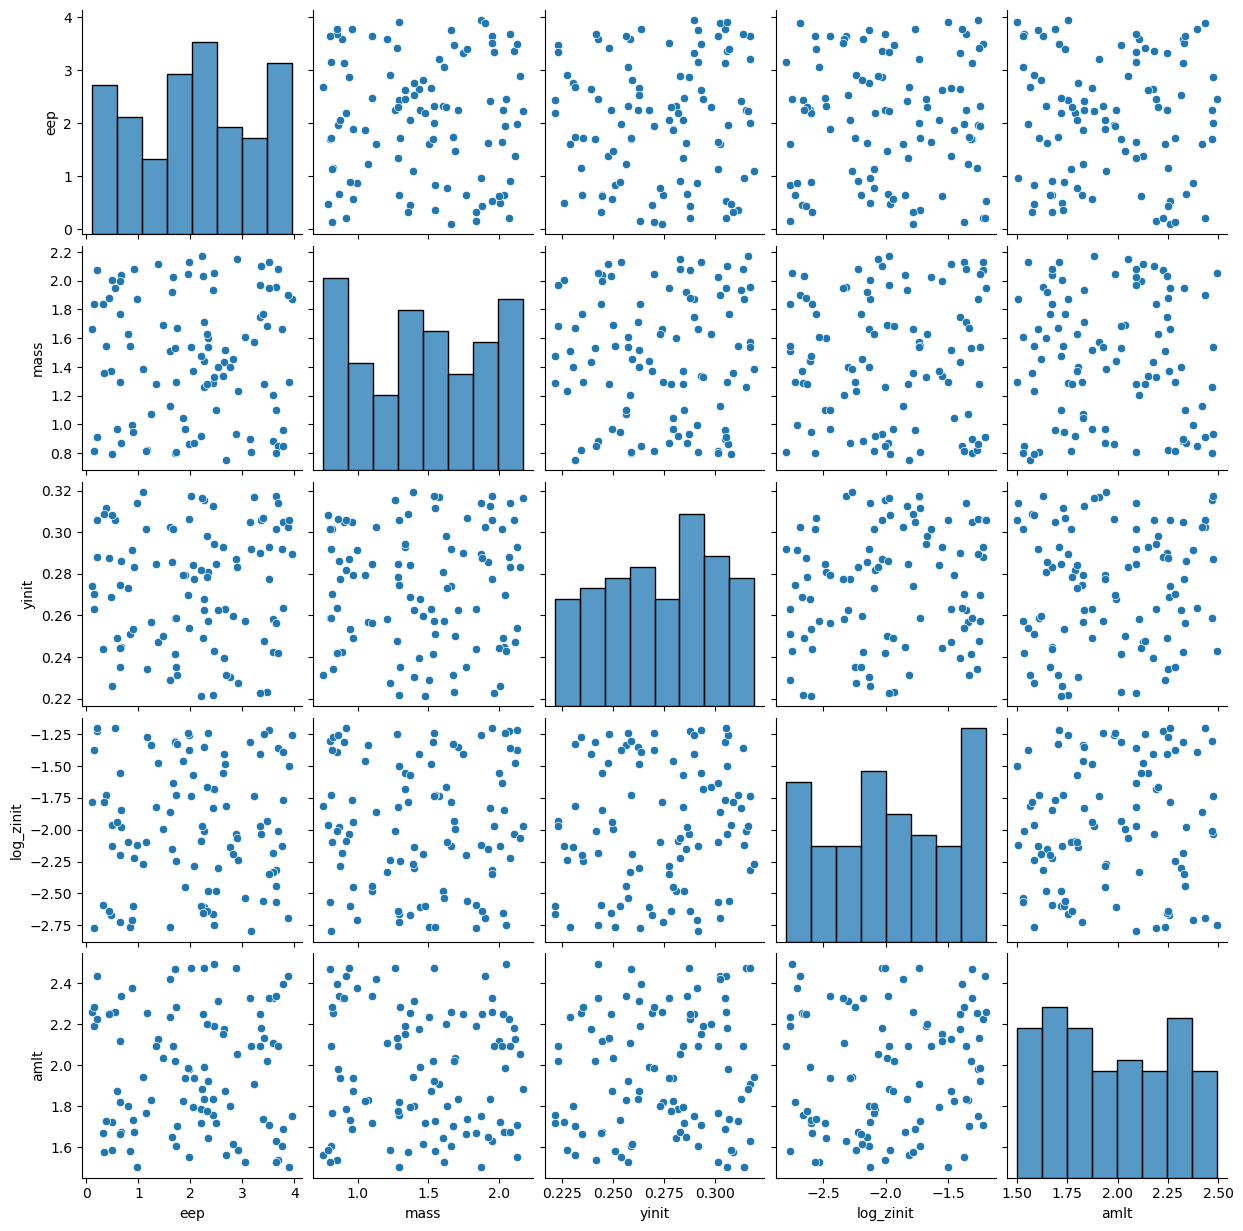

In [54]:
sns.pairplot(x)

In [55]:
y = pd.DataFrame(
    jax_model(x.to_numpy()),
    columns=["log_age", "log_Teff", "log_radius", "log_Dnu_freq_o"]
)
y

,log_age,log_Teff,log_radius,log_Dnu_freq_o
0,8.767060,3.980920,0.306293,1.747360
1,10.165322,3.697934,0.713624,1.023164
2,9.159166,3.973234,0.179224,1.891771
3,9.248166,3.701488,0.611074,1.310580
4,8.648359,3.952698,0.051945,2.064977
...,...,...,...,...
95,8.826199,3.895584,0.661058,1.256101
96,9.575167,3.760825,0.394411,1.656032
97,9.457837,3.802050,0.225920,1.843522
98,9.351871,3.752476,-0.042602,2.187402


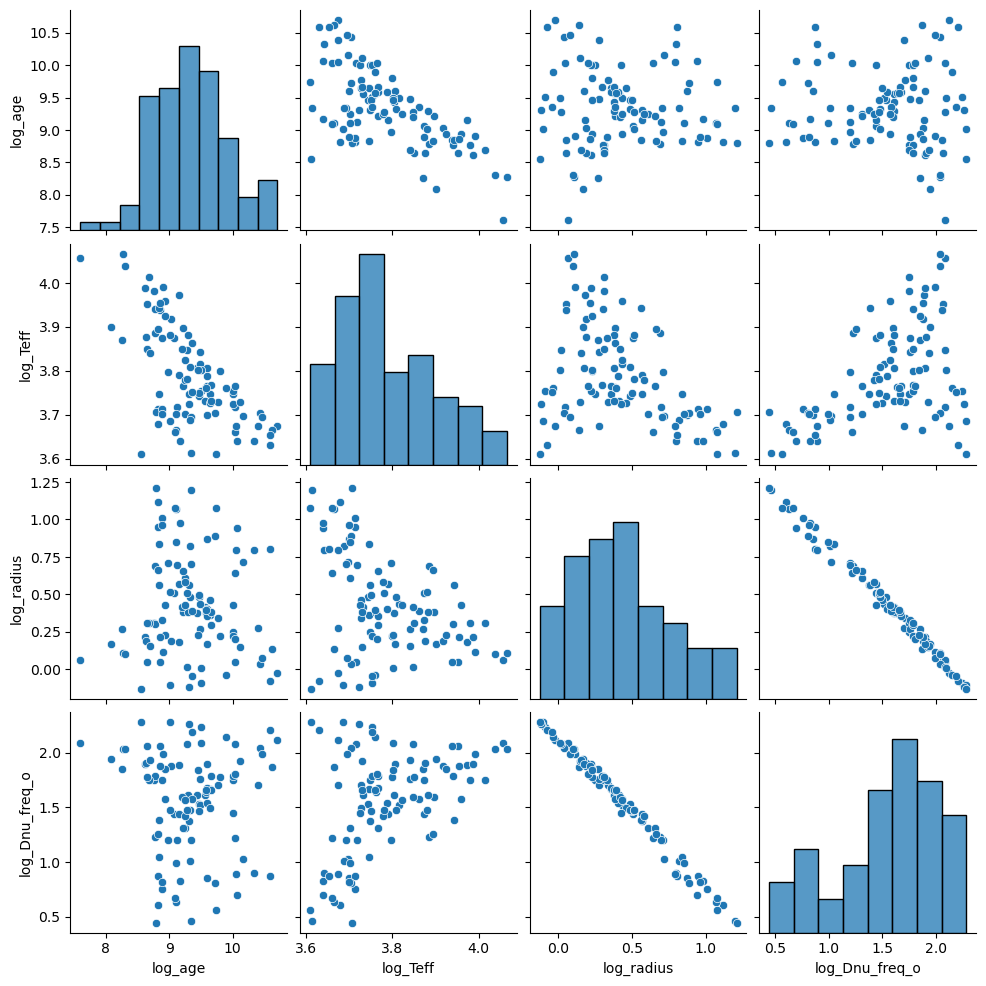

In [56]:
sns.pairplot(y);

In [77]:
num_points = 201
x_track = np.stack(
    [
        np.linspace(0, 4, num_points),
        np.ones(num_points)*1.,
        np.ones(num_points)*0.28,
        np.ones(num_points)*-2.0,
        np.ones(num_points)*2.0,
    ],
    axis=-1,
)
y_track = jax_model(x_track)

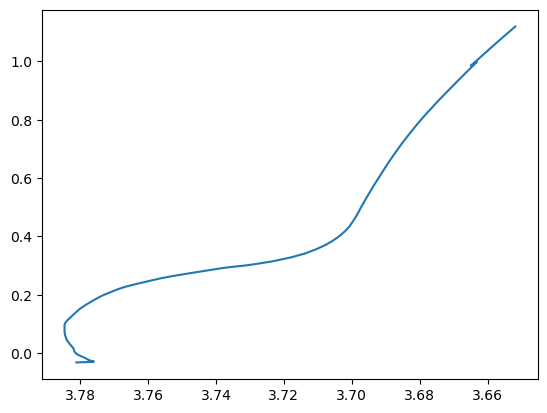

In [78]:
fig, ax = plt.subplots()

ax.plot(y_track[:, 1], y_track[:, 2])
ax.invert_xaxis()